<a href="https://colab.research.google.com/github/wcj365/data690fall21/blob/main/assignment_04/census_costs_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Census Costs Data Cleansing with Pandas

In [21]:
import pandas as pd

pd.set_option("display.max_columns", 20)


In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/wcj365/data690fall21/main/assignment_04/census_costs.txt", sep="\t", skiprows=1)
print(df)

   Census Year Total Population     Census Cost Average Cost Per Person
0         1790        3,929,214         $44,377              1.13 cents
1         1800        5,308,483         $66,109              1.24 cents
2         1810        7,239,881        $178,445              2.46 cents
3         1820        9,633,822        $208,526              2.16 cents
4         1830       12,866,020        $378,545              2.94 cents
5         1840       17,069,458        $833,371              4.88 cents
6         1850       23,191,876      $1,423,351              6.14 cents
7         1860       31,443,321      $1,969,377              6.26 cents
8         1870       38,558,371      $3,421,198              8.87 cents
9         1880       50,155,783      $5,790,678             11.54 cents
10        1890       62,979,766     $11,547,127             18.33 cents
11        1900       76,303,387     $11,854,000             15.54 cents
12        1910       91,972,266     $15,968,000             17.0

In [6]:
def cleanse_year(year):
    return year.replace("*","")

df["Year"] = df["Census Year"].apply(cleanse_year)

df

,Census Year,Total Population,Census Cost,Average Cost Per Person,Year
0,1790,"3,929,214","$44,377",1.13 cents,1790
1,1800,"5,308,483","$66,109",1.24 cents,1800
2,1810,"7,239,881","$178,445",2.46 cents,1810
3,1820,"9,633,822","$208,526",2.16 cents,1820
4,1830,"12,866,020","$378,545",2.94 cents,1830
5,1840,"17,069,458","$833,371",4.88 cents,1840
6,1850,"23,191,876","$1,423,351",6.14 cents,1850
7,1860,"31,443,321","$1,969,377",6.26 cents,1860
8,1870,"38,558,371","$3,421,198",8.87 cents,1870
9,1880,"50,155,783","$5,790,678",11.54 cents,1880


In [7]:
df["Year"] = df["Census Year"].apply(lambda x: x.replace("*",""))

df["Year"]

0     1790
1     1800
2     1810
3     1820
4     1830
5     1840
6     1850
7     1860
8     1870
9     1880
10    1890
11    1900
12    1910
13    1920
14    1930
15    1940
16    1950
17    1960
18    1970
19    1980
20    1990
21    2000
22    2010
Name: Year, dtype: object

In [8]:
df["Pop"] = df["Total Population"].apply(lambda x: x.replace(",",""))

df["Pop"]

0       3929214
1       5308483
2       7239881
3       9633822
4      12866020
5      17069458
6      23191876
7      31443321
8      38558371
9      50155783
10     62979766
11     76303387
12     91972266
13    105710620
14    122775046
15    131669275
16    151325798
17    179323175
18    203302031
19    226542199
20    248718301
21    281421906
22    308745538
Name: Pop, dtype: object

In [9]:
def cleanse_total_cost(total_cost):

    cost = total_cost.replace("$", "").replace(",", "")
    if "Billion" in cost:
        cost = cost.replace(" Billion", "000000000000")
    if ".50" in cost:
        cost = cost.replace(".50", "5")

    return cost

df["Cost"] = df["Census Cost"].apply(cleanse_total_cost)

df["Cost"]

0              44377
1              66109
2             178445
3             208526
4             378545
5             833371
6            1423351
7            1969377
8            3421198
9            5790678
10          11547127
11          11854000
12          15968000
13          25117000
14          40156000
15          67527000
16          91462000
17         127934000
18         247653000
19        1078488000
20        2492830000
21     4500000000000
22    13000000000000
Name: Cost, dtype: object

In [10]:
def cleanse_average_cost(average_cost):
    
    if "cents" in average_cost:
        cost = average_cost.replace(" cents", "")
    else:
        cost = average_cost.replace("$", "").replace(".", "")

    return cost

df["Average"] = df["Average Cost Per Person"].apply(cleanse_average_cost)

df["Average"]

0      1.13
1      1.24
2      2.46
3      2.16
4      2.94
5      4.88
6      6.14
7      6.26
8      8.87
9     11.54
10    18.33
11    15.54
12    17.07
13    23.76
14    32.71
15    51.29
16    60.44
17    71.34
18      122
19      476
20     1002
21     1599
22     4211
Name: Average, dtype: object

In [22]:
print(df)

   Census Year Total Population     Census Cost Average Cost Per Person  Year  \
0         1790        3,929,214         $44,377              1.13 cents  1790   
1         1800        5,308,483         $66,109              1.24 cents  1800   
2         1810        7,239,881        $178,445              2.46 cents  1810   
3         1820        9,633,822        $208,526              2.16 cents  1820   
4         1830       12,866,020        $378,545              2.94 cents  1830   
5         1840       17,069,458        $833,371              4.88 cents  1840   
6         1850       23,191,876      $1,423,351              6.14 cents  1850   
7         1860       31,443,321      $1,969,377              6.26 cents  1860   
8         1870       38,558,371      $3,421,198              8.87 cents  1870   
9         1880       50,155,783      $5,790,678             11.54 cents  1880   
10        1890       62,979,766     $11,547,127             18.33 cents  1890   
11        1900       76,303,

In [23]:
df.columns

Index(['Census Year', 'Total Population', 'Census Cost',
       'Average Cost Per Person', 'Year', 'Pop', 'Cost', 'Average'],
      dtype='object')

In [28]:
print(df[["Year","Pop"]])

    Year        Pop
0   1790    3929214
1   1800    5308483
2   1810    7239881
3   1820    9633822
4   1830   12866020
5   1840   17069458
6   1850   23191876
7   1860   31443321
8   1870   38558371
9   1880   50155783
10  1890   62979766
11  1900   76303387
12  1910   91972266
13  1920  105710620
14  1930  122775046
15  1940  131669275
16  1950  151325798
17  1960  179323175
18  1970  203302031
19  1980  226542199
20  1990  248718301
21  2000  281421906
22  2010  308745538


In [24]:
df_new = df[df.columns[4:]]
print(df_new)

    Year        Pop            Cost Average
0   1790    3929214           44377    1.13
1   1800    5308483           66109    1.24
2   1810    7239881          178445    2.46
3   1820    9633822          208526    2.16
4   1830   12866020          378545    2.94
5   1840   17069458          833371    4.88
6   1850   23191876         1423351    6.14
7   1860   31443321         1969377    6.26
8   1870   38558371         3421198    8.87
9   1880   50155783         5790678   11.54
10  1890   62979766        11547127   18.33
11  1900   76303387        11854000   15.54
12  1910   91972266        15968000   17.07
13  1920  105710620        25117000   23.76
14  1930  122775046        40156000   32.71
15  1940  131669275        67527000   51.29
16  1950  151325798        91462000   60.44
17  1960  179323175       127934000   71.34
18  1970  203302031       247653000     122
19  1980  226542199      1078488000     476
20  1990  248718301      2492830000    1002
21  2000  281421906   4500000000

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     23 non-null     object
 1   Pop      23 non-null     object
 2   Cost     23 non-null     object
 3   Average  23 non-null     object
dtypes: object(4)
memory usage: 864.0+ bytes


In [13]:
df_new.describe()

,Year,Pop,Cost,Average
count,23,23,23,23
unique,23,23,23,23
top,1790,17069458,67527000,6.26
freq,1,1,1,1


In [31]:
df_new["Year"] = df_new["Year"].astype(int)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     23 non-null     int64 
 1   Pop      23 non-null     object
 2   Cost     23 non-null     object
 3   Average  23 non-null     object
dtypes: int64(1), object(3)
memory usage: 864.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
for column in df_new.columns:
    if column == "Average":
        df_new[column] = df_new[column].astype(float)
    else:
        df_new[column] = df_new[column].astype(int)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     23 non-null     int64  
 1   Pop      23 non-null     int64  
 2   Cost     23 non-null     int64  
 3   Average  23 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 864.0 bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
df_new.describe()

,Year,Pop,Cost,Average
count,23.0000,2.300000e+01,2.300000e+01,23.000000
mean,1900.0000,1.039211e+08,7.610533e+11,336.873913
std,67.8233,9.622629e+07,2.827851e+12,927.824052
min,1790.0000,3.929214e+06,4.437700e+04,1.130000
25%,1845.0000,2.013067e+07,1.128361e+06,5.510000
50%,1900.0000,7.630339e+07,1.185400e+07,17.070000
75%,1955.0000,1.653245e+08,1.096980e+08,65.890000
max,2010.0000,3.087455e+08,1.300000e+13,4211.000000


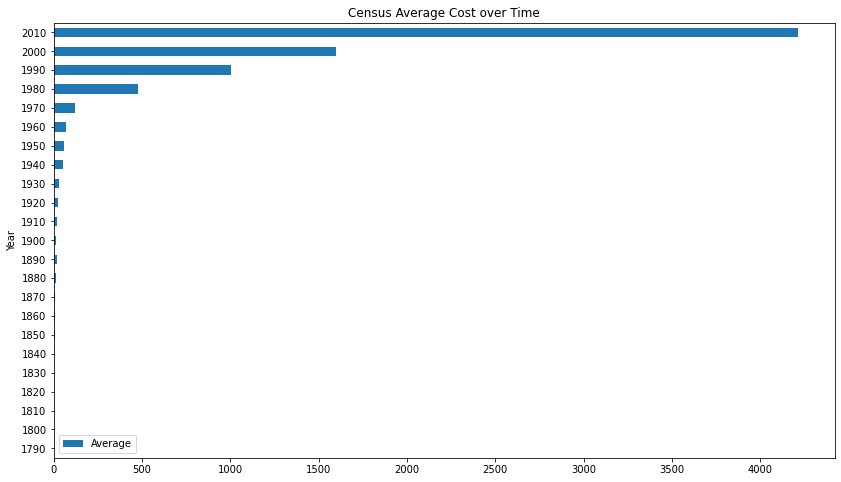

In [39]:
df_new.plot(kind="barh", x="Year", y="Average", figsize=(14,8), title="Census Average Cost over Time")

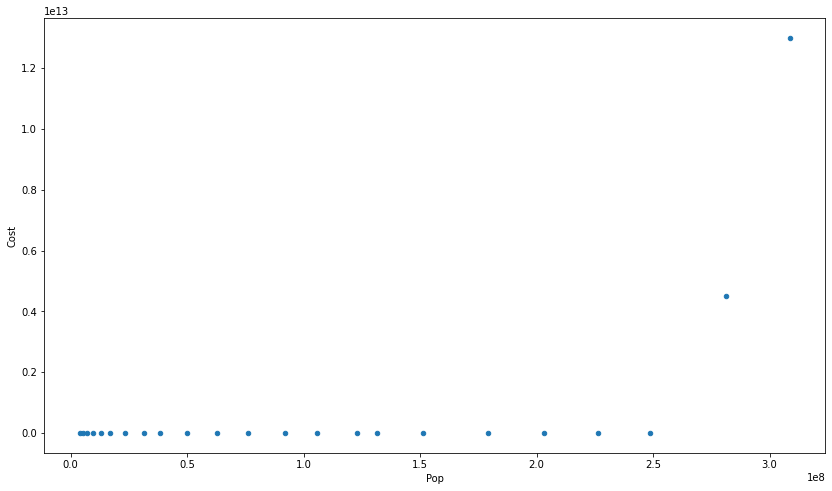

In [40]:
df_new.plot(kind="scatter", x="Pop", y="Cost", figsize=(14,8))